# Нейронные сети
*********
###Лабораторная работа 1
###Программа диалогового задания гармонического сигнала и его визуализации

In [1]:
import matplotlib.pyplot as plt
import numpy as np

print('-----------------------------------------------------')
print('*** Программа визуализации гармонического сигнала ***')

# region Ввод частоты и амплитуды сигнала
print('-------------------Введите данные:-------------------')

f0      = int(input('Введите частоту сигнала в герцах: '))
A       = int(input('Введите амплитуду сигнала в условных единицах: '))
phi     = int(input('Введите фазу сигнала, рад: '))
NT      = int(input('Введите количество периодов наблюдения, ед.: '))
mvis    = int(input('Введите коэффициент уменьшения интервала дискретизации: '))

print('-----------------------------------------------------')
# endregion
'''
-------------------Введите данные:-------------------
Введите частоту сигнала в герцах: 500
Введите амплитуду сигнала в условных единицах: 5
Введите фазу сигнала, рад: 30
Введите количество периодов наблюдения, ед.: 5
Введите коэффициент уменьшения интервала дискретизации: 5
-----------------------------------------------------
'''

# region Вывод введенных данных

print('------------------Введенные данные:------------------')
print('Частота сигнала (Гц)                           = ', str(f0))
print('Амплитуда сигнала (усл.ед.)                    = ', str(A))
print('Фаза сигнала, рад                              = ', str(phi))
print('Количество периодов сигнала                    = ', str(NT))
print('Коэффициент уменьшения интервала дискретизации = ', str(mvis))
print('-----------------------------------------------------')

w               = 2 * np.pi * f0    # Переход к круговой частоте (рад/сек)
T               = 1 / f0            # Период исходного сигнала (сек)
dtn             = np.pi / w         # Интервал дискретизации Найквиста (теорема Котельникова)
dtv             = dtn / mvis        # Интервал дискретизации, пригодный для визуализации
Tnab            = NT * T            # Интервал наблюдения (сек)
print('Интервал наблюдения = ', str(Tnab), ' сек')

Nn = Tnab / dtn  # Количество точек в интервале наблюдения для дискретизации Найквиста
Nv = Tnab / dtv  # Количество точек в интервале наблюдения для интервала дискретизации, пригодного для визуализации
print('Количество точек в интервале наблюдения для дискретизации Найквиста = ', Nn)

print('Количество точек в интервале наблюдения для интервала дискретизации, пригодного для визуализации = ', Nv)

tn = np.multiply(dtn, np.arange(0, Nn))  # Вектор времени (сек), дискретизированный в соответствии с критерием Найквиста
tv = np.multiply(dtv, np.arange(0, Nv))  # и c интервалом дискретизации, пригодным для визуализации
y1n = A * np.cos(2 * np.pi * f0 * tn + phi)  # Вектора сигналов, дискретизированных в соответствии с критерием Найквиста
y2n = A * np.sin(2 * np.pi * f0 * tn + phi)
y1v = A * np.cos(2 * np.pi * f0 * tv + phi)  # Вектора сигналов, дискретизированных c интервалом дискретизации, пригодным для визуализации
y2v = A * np.sin(2 * np.pi * f0 * tv + phi)


fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(tn, y1n, 'r-*')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.title('Дискретизация по Найквисту')
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.subplot(2, 2, 2)
plt.plot(tv, y1v, 'b')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.title('Дискретизация в ' + str(mvis) + ' раз точнее')
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.subplot(2, 2, 3)
plt.plot(tn, y2n, 'r-*')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.subplot(2, 2, 4)
plt.plot(tv, y2v, 'b')
plt.axis([0, Tnab, -1.1 * A, 1.1 * A])
plt.xlabel('Time, sec')
plt.ylabel('Signal')

plt.show()

-----------------------------------------------------
*** Программа визуализации гармонического сигнала ***
-------------------Введите данные:-------------------


*** Программа вычисления ДПФ гармонического сигнала ***


*** Программа вычисления ДПФ гармонического сигнала ***


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


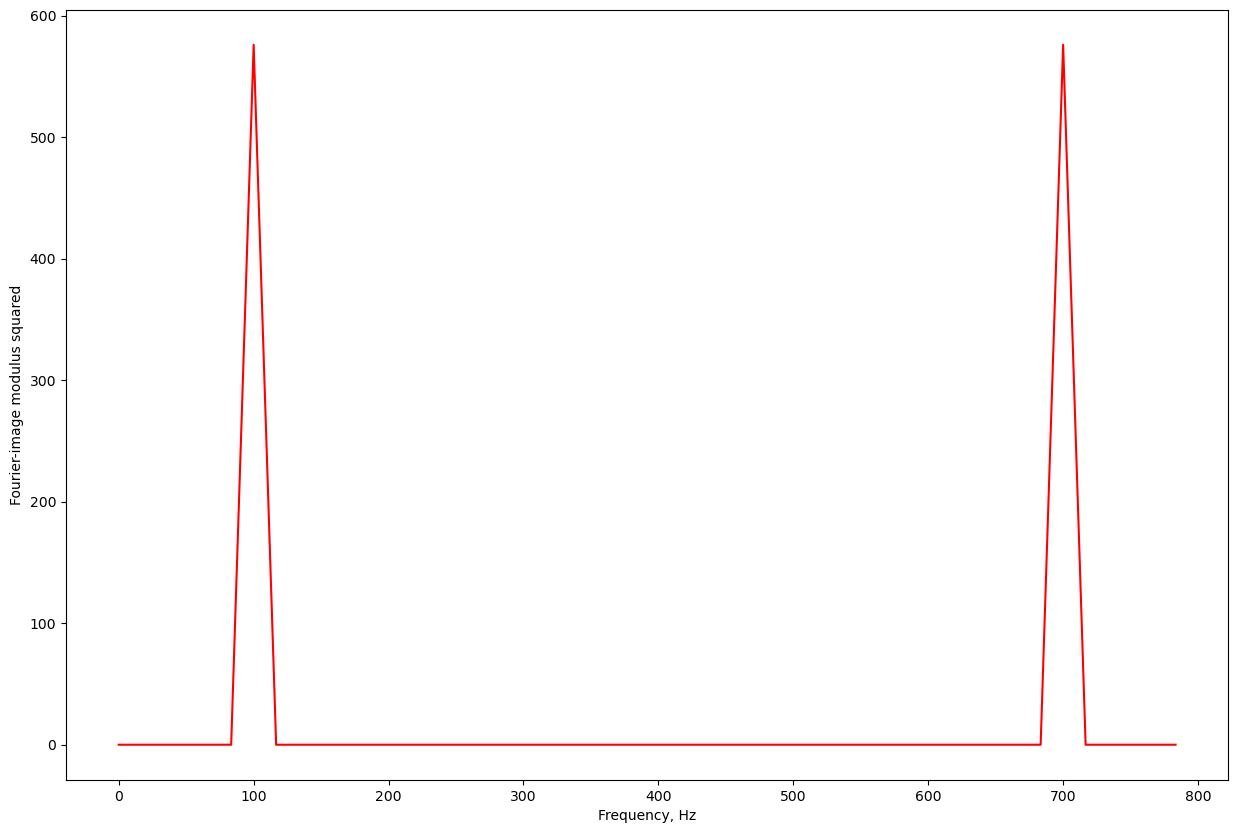

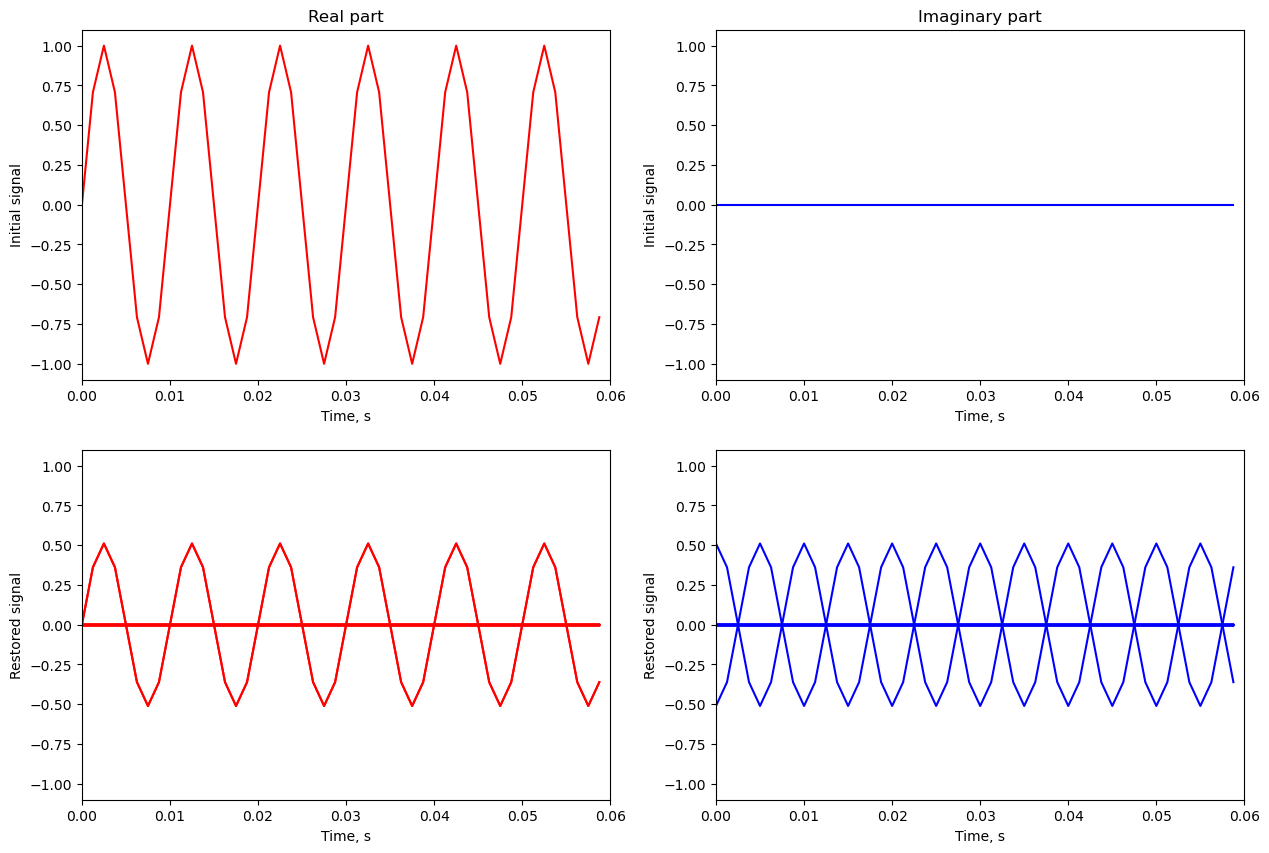

**********   Конец работы   **********


In [3]:
# Программа вычисления ДПФ гармонического сигнала
print('*** Программа вычисления ДПФ гармонического сигнала ***')
A = float(np.real(input('Введите амплитуду сигнала, ед.: ')))
f0 = float(np.real(input('Введите частоту сигнала, Гц: ')))

fdn = 2 * f0  # Частота дискретизации в соответствии с критерием Найквиста
mvis = 4
fdv = mvis * fdn  # Частота дискретизации для визуализации
dt = 1 / fdv  # Интервал дискретизации по времени
T = 1 / f0  # Период сигнала
NT = 6
t = np.arange(0, NT * T, dt)  # Вектор времени, с
y = A * np.sin(2 * np.pi * f0 * t)  # Вектор сигнала
N = len(y)

# Дискретное преобразование Фурье
k = np.arange(0, N)
Ex = np.exp(-1j * 2 * np.pi / N * np.outer(k, k))
Y = np.dot(y, Ex)

# Обратное дискретное преобразование Фурье
Ex = np.exp(1j * 2 * np.pi / N * np.outer(k, k))
ys = Y / (N - 1) * Ex

Y2 = Y * np.conj(Y)  # Квадрат модуля Фурье-образа
ff = k * fdv / N  # Вектор частоты, Гц

# plt.figure(1)5
fig = plt.figure(figsize=(15, 10))
plt.plot(ff, Y2, 'r')
plt.xlabel('Frequency, Hz')
plt.ylabel('Fourier-image modulus squared')
plt.show()

# plt.figure(2)
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(t, np.real(y), 'r')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.title('Real part')
plt.xlabel('Time, s')
plt.ylabel('Initial signal')

plt.subplot(2, 2, 2)
plt.plot(t, np.imag(y), 'b')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.title('Imaginary part')
plt.xlabel('Time, s')
plt.ylabel('Initial signal')

plt.subplot(2, 2, 3)
plt.plot(t, np.real(ys), 'r')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.xlabel('Time, s')
plt.ylabel('Restored signal')

plt.subplot(2, 2, 4)
plt.plot(t, np.imag(ys), 'b')
plt.axis([0, NT * T, -1.1 * A, 1.1 * A])
plt.xlabel('Time, s')
plt.ylabel('Restored signal')
plt.show()

print('**********   Конец работы   **********')

